#Import Modules for Data Analysis


In [542]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Load Data

In [543]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [544]:
PassengerIds=test['PassengerId']
PassengerIds

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [545]:
#statistical info
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [546]:
#data type info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Explatory Data Analysis

In [548]:
df=train.copy()

In [549]:
df.shape

(891, 12)

#Missin Values

In [550]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [551]:
df.isna().mean(axis=0).sort_values(ascending=False)
#we can see that the cabin contains a lot of missing values(77%) so it would make sense to drop it by using imputation or it will lead the model to perform poorly(we can do the same for column age)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

#Correlation Heat Map

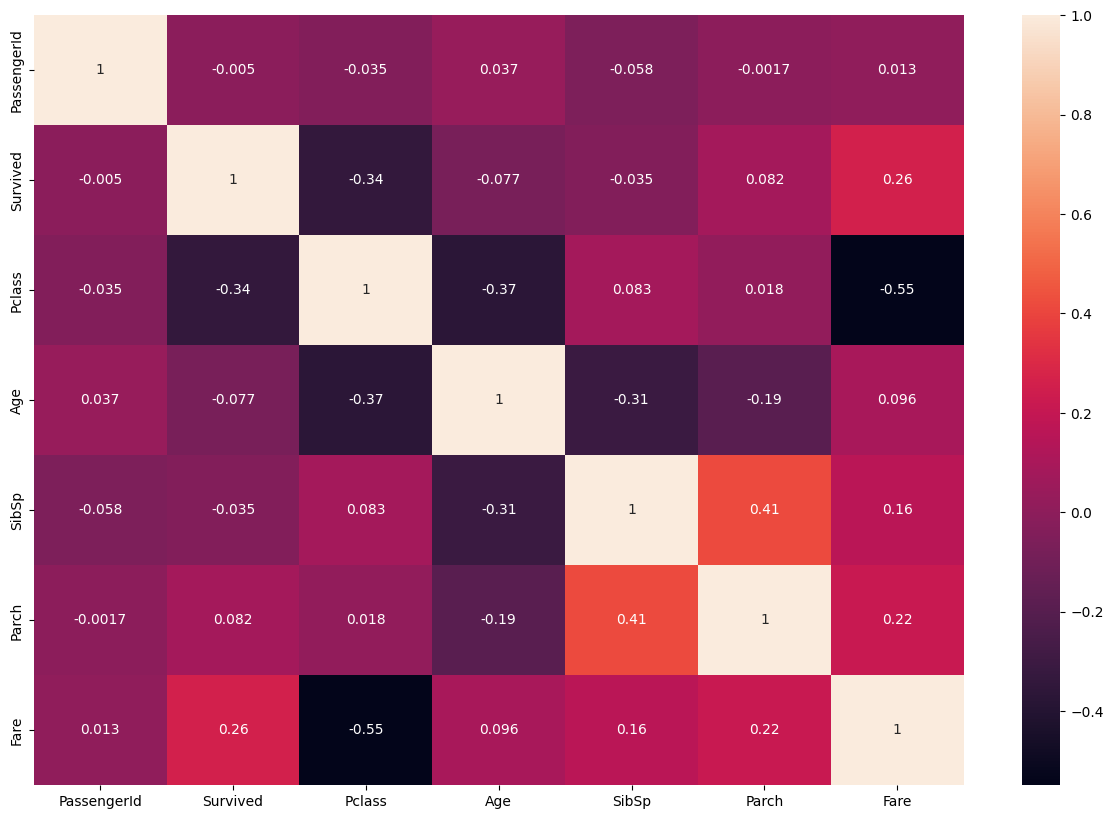

In [552]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [553]:
# This code will show us the most correlated features
#Correlation indicates how much one variable changes when another variable changes and range from -1 to 1
correlation_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
most_correlated_pairs = (correlation_matrix.where(mask)
                         .stack()
                         .reset_index()
                         .rename(columns={0: 'correlation'})
                         .sort_values(by='correlation', ascending=False))
num_most_correlated = 10
for i, (feature1, feature2, correlation) in enumerate(most_correlated_pairs.head(num_most_correlated).itertuples(index=False), 1):
    print(f"{i}. {feature1} - {feature2}: {correlation:.2f}")

1. SibSp - Parch: 0.41
2. Survived - Fare: 0.26
3. Parch - Fare: 0.22
4. SibSp - Fare: 0.16
5. Age - Fare: 0.10
6. Pclass - SibSp: 0.08
7. Survived - Parch: 0.08
8. PassengerId - Age: 0.04
9. Pclass - Parch: 0.02
10. PassengerId - Fare: 0.01


#Target Feature Distribution

In [554]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Text(0, 0.5, 'count')

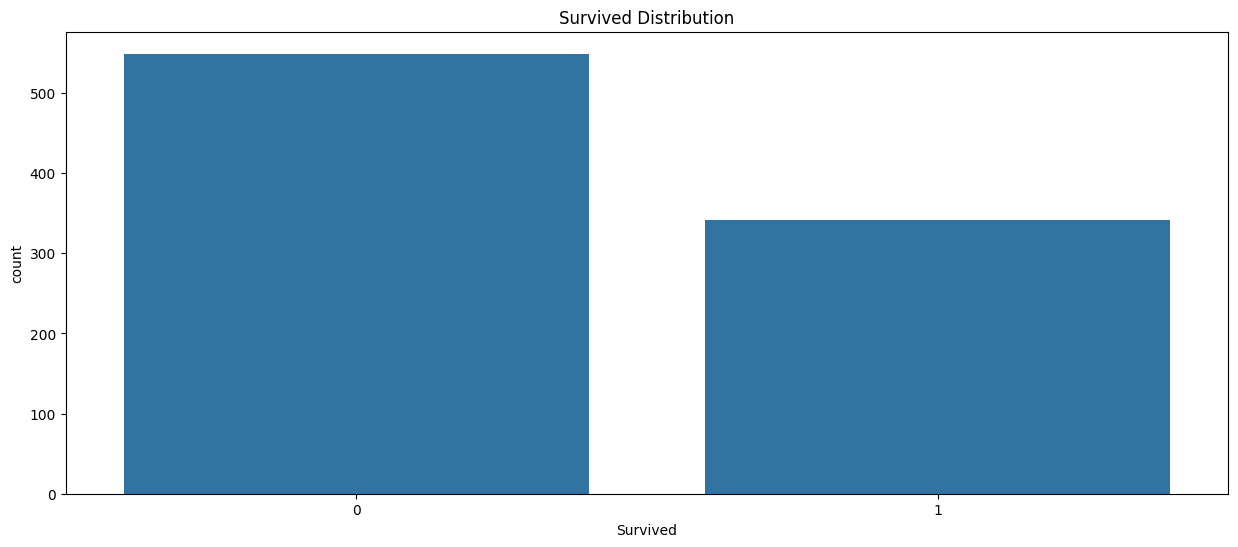

In [555]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x=df['Survived'])
plt.title('Survived Distribution')
plt.xlabel('Survived')
plt.ylabel('count')

#Categorical Feature Distribution

In [556]:
categorical_features=df.select_dtypes(include=(['object','category'])).columns.tolist()
categorical_features.remove('Name')
categorical_features.remove('Cabin')
categorical_features.remove('Ticket')

categorical_features

['Sex', 'Embarked']

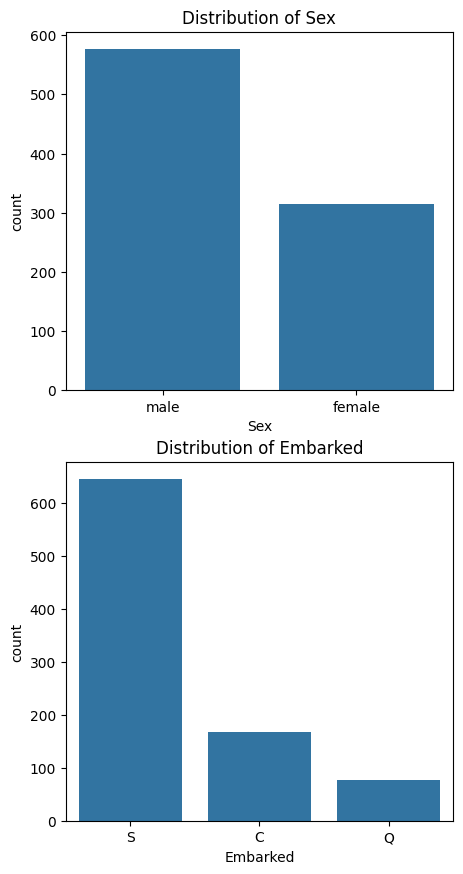

In [557]:
fig, axes=plt.subplots(len(categorical_features),1,figsize=(5,1))
plt.subplots_adjust(top=8)
for index,column in enumerate(categorical_features):
  sns.countplot(data=df,x=column,ax=axes[index])
  axes[index].set_title(f'Distribution of {column}')
plt.show()

#Numerical Features Distribution

In [558]:
numerical_features=df.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_features.remove('PassengerId')
numerical_features.remove('Survived')

numerical_features

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

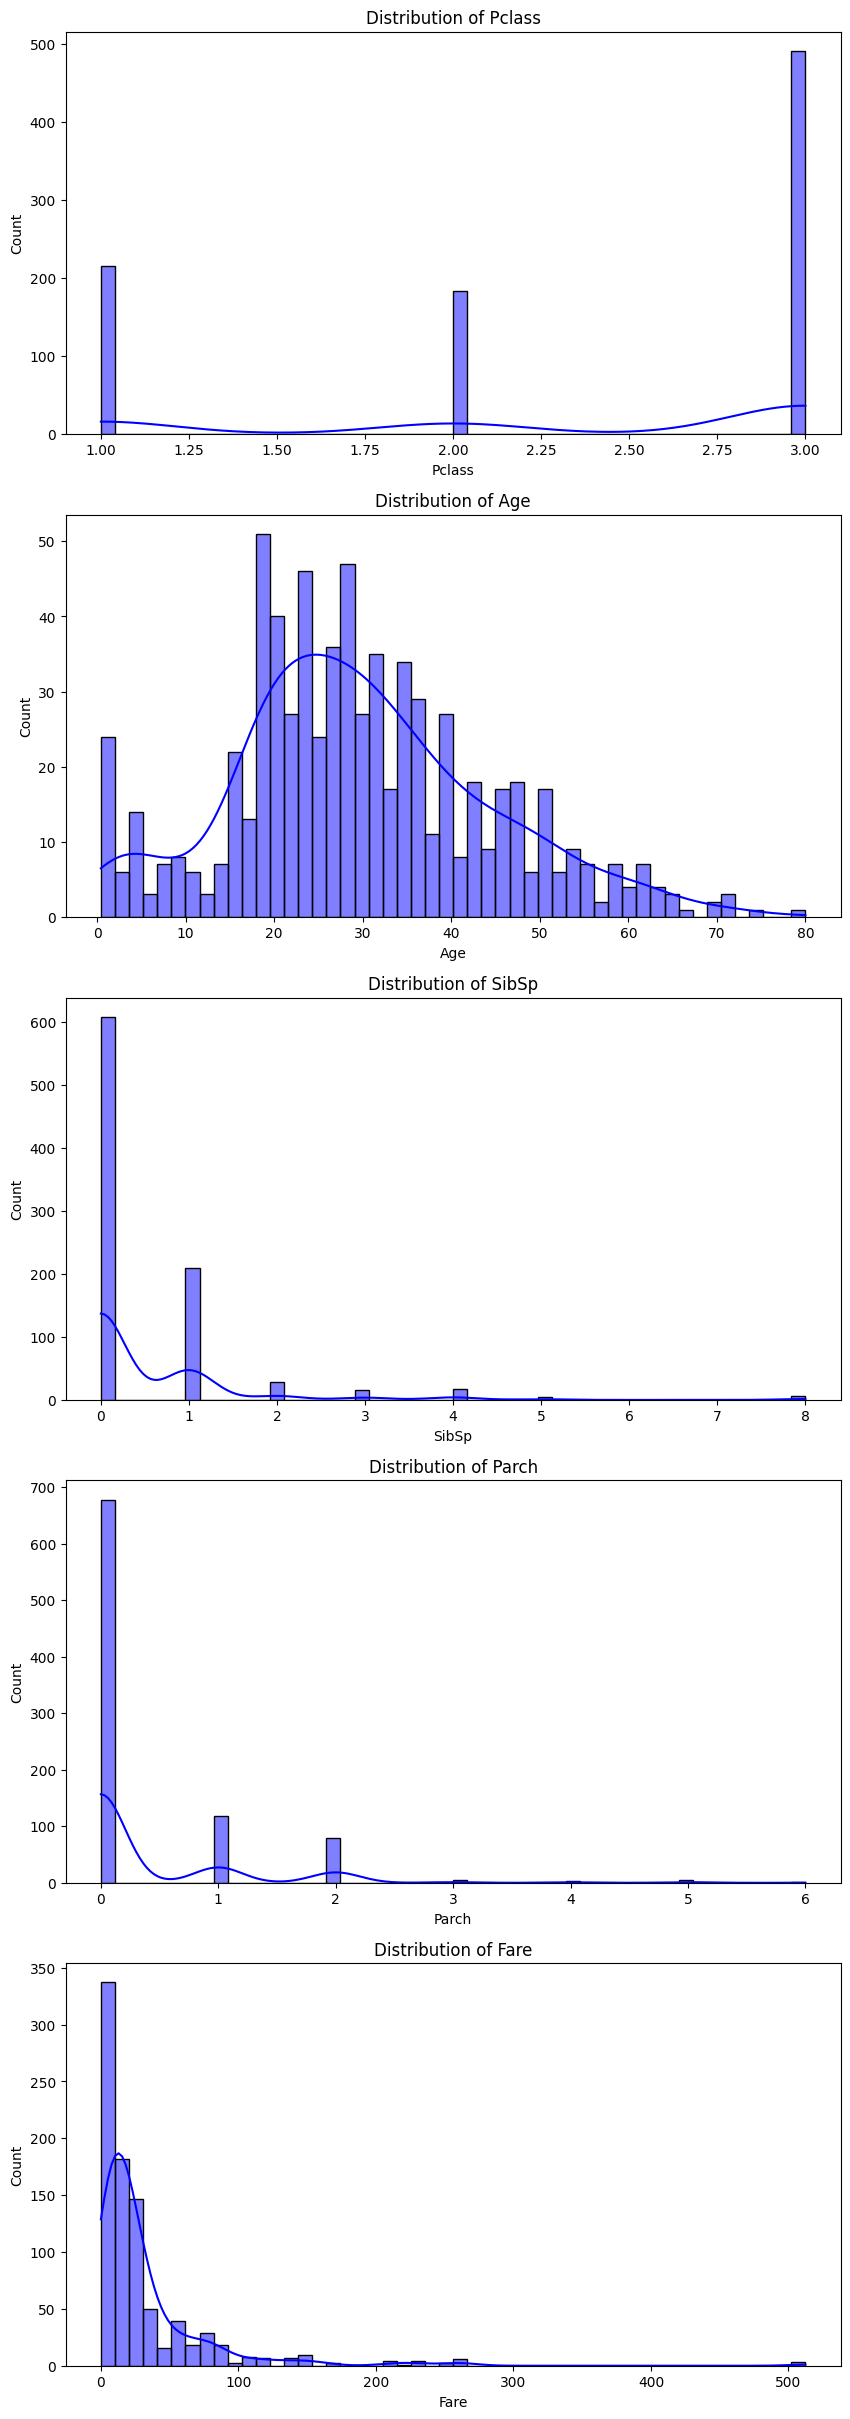

In [559]:
fig,axes=plt.subplots(len(numerical_features),1,figsize=(10,6))
plt.subplots_adjust(top=4)

for index,column in enumerate(numerical_features):
   sns.histplot(train[column],color='b',bins=50,ax=axes[index],kde=True)
   axes[index].set_title(f'Distribution of {column}')
plt.show()

In [560]:
#In this case,only the age distribution have a good distibution
# The rest have bad distribution and for example the Fare feature has a heavy tail

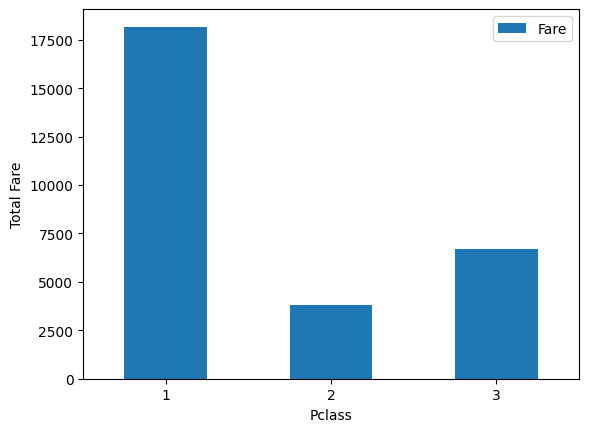

In [561]:
class_fare = train.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

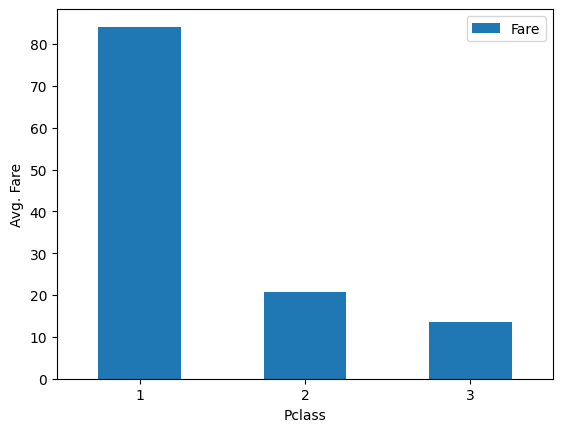

In [562]:
class_fare = train.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

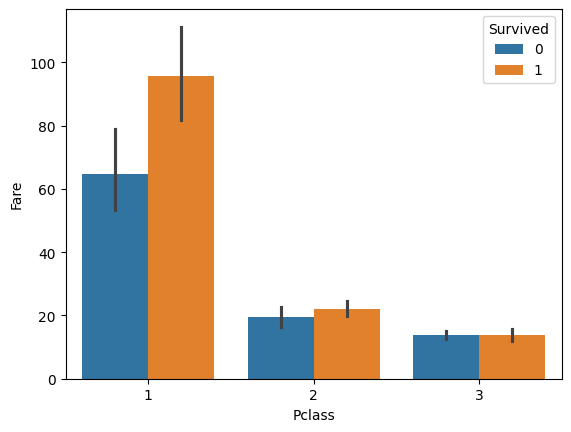

In [563]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

In [564]:
#This plot has a comparison of survived passengers depending on the ticket fare and passenger class.



<Axes: xlabel='Survived', ylabel='Fare'>

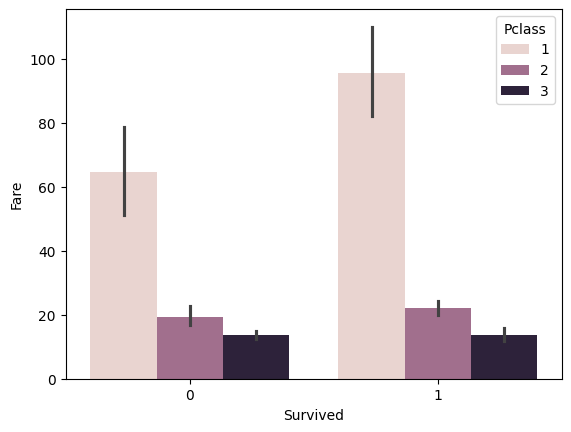

In [565]:
sns.barplot(data=train, x='Survived', y='Fare', hue='Pclass')

#Pre-Processing

In [566]:
def drop_feature(train):
  return train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [567]:
#Dropping useless features
train=drop_feature(train)
test=drop_feature(test)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


#Imputaion and Encoding

In [568]:
X=train.drop('Survived',axis=1)
y=train.Survived


In [569]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [570]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [571]:
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer

In [572]:
columns_to_Encode=['Sex','Embarked']

In [573]:
preprocessor=make_column_transformer(
   ( SimpleImputer(strategy='mean'),['Age']),
  ( make_pipeline(
        SimpleImputer(strategy='most_frequent'),
        OneHotEncoder(drop='if_binary',handle_unknown='ignore')
    ),['Embarked']),
  (OneHotEncoder(drop='if_binary',handle_unknown='ignore'),['Sex']),
   remainder='passthrough'
)
#First step is imputing the column Age with SimpleImputer using the mean strategy since it is numeric(its has 22% of missing values).So the missing values in the column Age will be replaced by the mean value
#For the column Sex we use OneHotEncoder.Here when drop='if_binary',OneHotEncoder will automatically drop one ot the binary columns after encoding if the original feature is binary
#remainder='passthrough' means that the rest of the columns will not be touched,they will be ignired by the preprocessor
#The Embarked column is categroical and contains missing values so instead of doing these steps seperatley which will lead to problems we use a pipeline to comnine the simple imputer abd the encoder

In [574]:
X['Fare'] = np.log(df['Fare']+1)

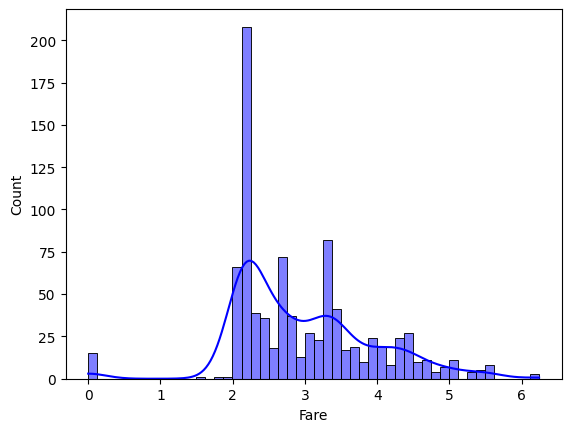

In [575]:
sns.histplot(X['Fare'],color='b',bins=50,kde=True)
plt.show()

In [576]:
X_transformed = preprocessor.fit_transform(X)
X_transformed_df=pd.DataFrame(X_transformed,columns=preprocessor.get_feature_names_out())
X_transformed_df

,simpleimputer__Age,pipeline__Embarked_C,pipeline__Embarked_Q,pipeline__Embarked_S,onehotencoder__Sex_male,remainder__Pclass,remainder__SibSp,remainder__Parch,remainder__Fare
0,22.000000,0.0,0.0,1.0,1.0,3.0,1.0,0.0,2.110213
1,38.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.280593
2,26.000000,0.0,0.0,1.0,0.0,3.0,0.0,0.0,2.188856
3,35.000000,0.0,0.0,1.0,0.0,1.0,1.0,0.0,3.990834
4,35.000000,0.0,0.0,1.0,1.0,3.0,0.0,0.0,2.202765
...,...,...,...,...,...,...,...,...,...
886,27.000000,0.0,0.0,1.0,1.0,2.0,0.0,0.0,2.639057
887,19.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.433987
888,29.699118,0.0,0.0,1.0,0.0,3.0,1.0,2.0,3.196630
889,26.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.433987


In [577]:
test_transformed=preprocessor.fit_transform(test)
test_transformed_df=pd.DataFrame(test_transformed,columns=preprocessor.get_feature_names_out())
test_transformed_df

,simpleimputer__Age,pipeline__Embarked_C,pipeline__Embarked_Q,pipeline__Embarked_S,onehotencoder__Sex_male,remainder__Pclass,remainder__SibSp,remainder__Parch,remainder__Fare
0,34.50000,0.0,1.0,0.0,1.0,3.0,0.0,0.0,7.8292
1,47.00000,0.0,0.0,1.0,0.0,3.0,1.0,0.0,7.0000
2,62.00000,0.0,1.0,0.0,1.0,2.0,0.0,0.0,9.6875
3,27.00000,0.0,0.0,1.0,1.0,3.0,0.0,0.0,8.6625
4,22.00000,0.0,0.0,1.0,0.0,3.0,1.0,1.0,12.2875
...,...,...,...,...,...,...,...,...,...
413,30.27259,0.0,0.0,1.0,1.0,3.0,0.0,0.0,8.0500
414,39.00000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,108.9000
415,38.50000,0.0,0.0,1.0,1.0,3.0,0.0,0.0,7.2500
416,30.27259,0.0,0.0,1.0,1.0,3.0,0.0,0.0,8.0500


#Model Training

In [578]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_transformed_df,y,test_size=0.2)

In [579]:
pip install catboost

In [580]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [581]:
from sklearn.metrics import accuracy_score

In [582]:
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_val)
accuracy=accuracy_score(y_pred,y_val)
accuracy

0.7206703910614525

In [583]:
model=XGBClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_val)
accuracy=accuracy_score(y_pred,y_val)
accuracy

0.7150837988826816

In [584]:
model=LGBMClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_val)
accuracy=accuracy_score(y_pred,y_val)
accuracy

[LightGBM] [Info] Number of positive: 263, number of negative: 449
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369382 -> initscore=-0.534869
[LightGBM] [Info] Start training from score -0.534869
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


0.7374301675977654

In [585]:
test_transformed_df.isna().mean(axis=0).sort_values(ascending=False)

remainder__Fare            0.002392
simpleimputer__Age         0.000000
pipeline__Embarked_C       0.000000
pipeline__Embarked_Q       0.000000
pipeline__Embarked_S       0.000000
onehotencoder__Sex_male    0.000000
remainder__Pclass          0.000000
remainder__SibSp           0.000000
remainder__Parch           0.000000
dtype: float64

In [586]:
imputer = SimpleImputer(strategy='mean')
test_transformed_df_imputed = pd.DataFrame(imputer.fit_transform(test_transformed_df), columns=test_transformed_df.columns)
test_transformed_df['Fare'] = np.log(df['Fare']+1)

In [587]:
ypred=model.predict(test_transformed_df_imputed)
len(ypred)

418

In [588]:
test_transformed_df_imputed

,simpleimputer__Age,pipeline__Embarked_C,pipeline__Embarked_Q,pipeline__Embarked_S,onehotencoder__Sex_male,remainder__Pclass,remainder__SibSp,remainder__Parch,remainder__Fare
0,34.50000,0.0,1.0,0.0,1.0,3.0,0.0,0.0,7.8292
1,47.00000,0.0,0.0,1.0,0.0,3.0,1.0,0.0,7.0000
2,62.00000,0.0,1.0,0.0,1.0,2.0,0.0,0.0,9.6875
3,27.00000,0.0,0.0,1.0,1.0,3.0,0.0,0.0,8.6625
4,22.00000,0.0,0.0,1.0,0.0,3.0,1.0,1.0,12.2875
...,...,...,...,...,...,...,...,...,...
413,30.27259,0.0,0.0,1.0,1.0,3.0,0.0,0.0,8.0500
414,39.00000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,108.9000
415,38.50000,0.0,0.0,1.0,1.0,3.0,0.0,0.0,7.2500
416,30.27259,0.0,0.0,1.0,1.0,3.0,0.0,0.0,8.0500


#Test Submission

In [589]:
submission = pd.DataFrame({"PassengerId": PassengerIds, "Survived": ypred})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [590]:
submission.to_csv("submission.csv", index=False)